<a href="https://colab.research.google.com/github/neerajac19/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [59]:
#importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading file path
df=pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction-Neeraja C/Copy of SeoulBikeData.csv',encoding='latin')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#making a copy
bike_data=df.copy()

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
#converting date column
bike_data['Date'] = pd.to_datetime(bike_data['Date'], format='%d/%m/%Y')
bike_data['year']=bike_data['Date'].map(lambda x: x.year).astype("object")
bike_data['month']=bike_data['Date'].dt.month_name()
bike_data['day']=(bike_data['Date']).dt.day_name()

In [8]:
#drop the 'Date' column 
bike_data.drop(columns=['Date'],inplace=True)

In [9]:
# Divide data into numerial features and categorical feature
numeric_features=bike_data.select_dtypes(exclude='object')
categorical_features=bike_data.select_dtypes(include='object')

**Seasons**

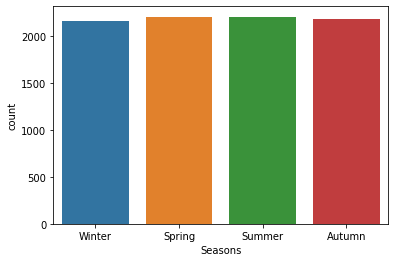

In [10]:
#seasons and count
sns.countplot(bike_data['Seasons'])

In [11]:
season_bike_count=bike_data.groupby('Seasons')['Rented Bike Count'].sum().reset_index().sort_values('Rented Bike Count',ascending=False)

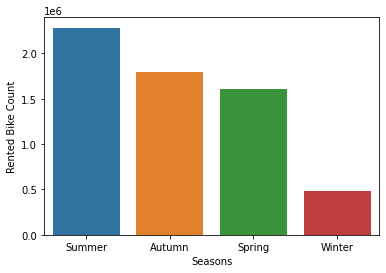

In [12]:
plt.figure(figsize = (6,4))
sns.barplot(x = season_bike_count['Seasons'], y = season_bike_count['Rented Bike Count'] )
plt.show()

***There are high rental demand in summer.***



**Days**

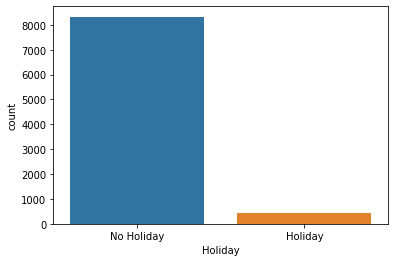

In [13]:
sns.countplot(bike_data['Holiday'])

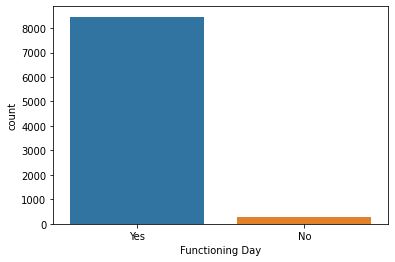

In [14]:
sns.countplot(bike_data['Functioning Day'])

 ***Rental count in workingday is much more than that in holiday.***

**Outliers**

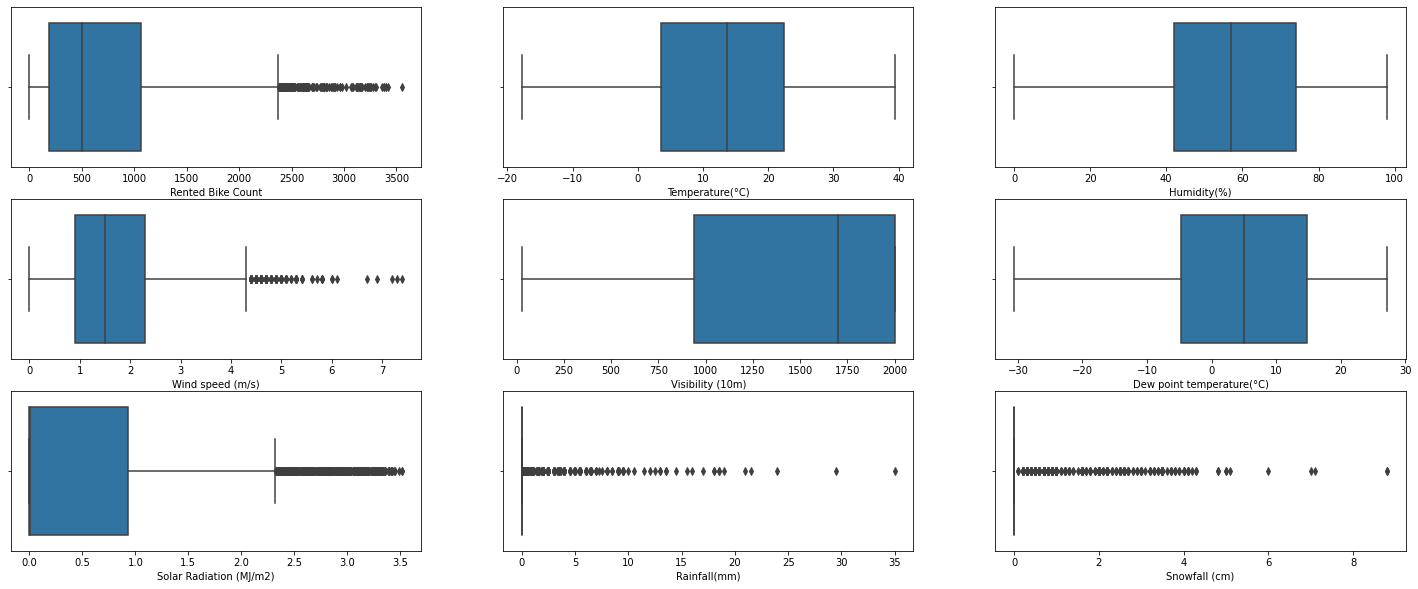

In [15]:
# boxplot in continuous variable
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(25,10)

sns.boxplot(bike_data['Rented Bike Count'], ax=axes[0][0])
sns.boxplot(bike_data['Temperature(°C)'], ax=axes[0][1])
sns.boxplot(bike_data['Humidity(%)'], ax=axes[0][2])
sns.boxplot(bike_data['Wind speed (m/s)'], ax=axes[1][0])
sns.boxplot(bike_data['Visibility (10m)'], ax=axes[1][1])
sns.boxplot(bike_data['Dew point temperature(°C)'], ax=axes[1][2])
sns.boxplot(bike_data['Solar Radiation (MJ/m2)'], ax=axes[2][0])
sns.boxplot(bike_data['Rainfall(mm)'], ax=axes[2][1])
sns.boxplot(bike_data['Snowfall (cm)'], ax=axes[2][2])

In [16]:
bike_data['day']=bike_data['day'].apply(lambda x : 'Weekend' if x=='Saturday' or x=='Sunday' else 'Weekdays')

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

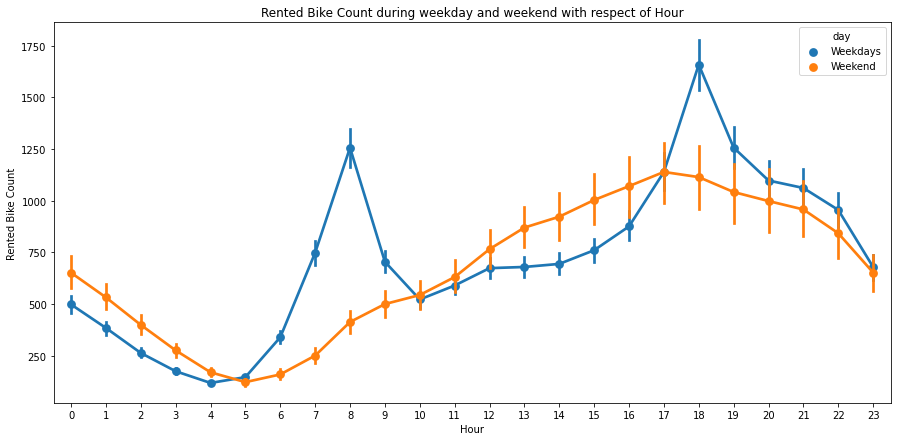

In [17]:
# Getting feel of week column with pointplot  
plt.figure(figsize=(15,7))
sns.pointplot(x=bike_data["Hour"],y=bike_data['Rented Bike Count'],hue=bike_data['day'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

***The demand is high in the afternoon on the weekend. While there is more demand during office hours in weekdays.***

In [18]:
# droping the days of week column from bike_data and from categorical feature 
bike_data.drop(columns=['day'], inplace=True)
categorical_features.drop(columns=['day'], inplace=True)

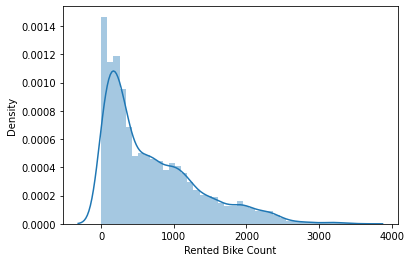

In [19]:
sns.distplot(bike_data['Rented Bike Count'])
  # plt.tight_layout()
plt.show()

 ***Dependent variable is right skewed.***

**Correlation Map**

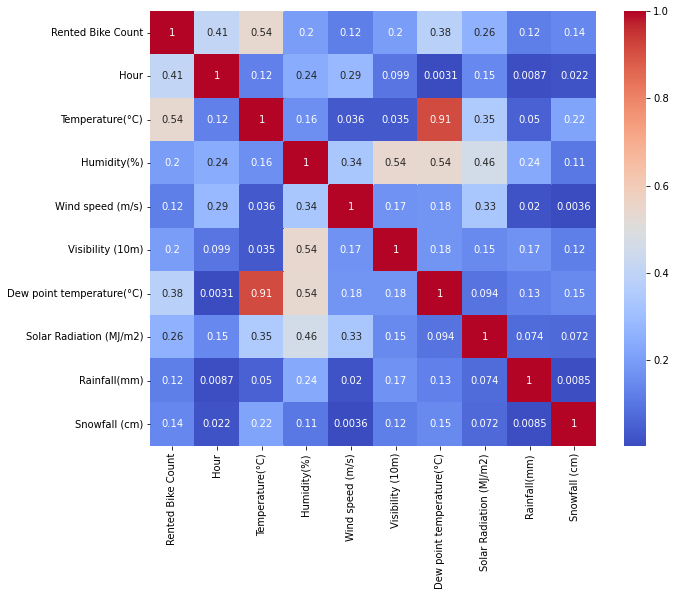

In [20]:
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(abs(bike_data.corr()), cmap='coolwarm', annot=True)


***Dew point temperature is highly correlated to Temperature.So we can remove that feature.***

In [21]:
bike_data.drop(columns=['Dew point temperature(°C)'], inplace=True)

In [22]:
new_df=pd.get_dummies(bike_data,drop_first=True,sparse=True)

In [23]:
new_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype           
---  ------                   --------------  -----           
 0   Rented Bike Count        8760 non-null   int64           
 1   Hour                     8760 non-null   int64           
 2   Temperature(°C)          8760 non-null   float64         
 3   Humidity(%)              8760 non-null   int64           
 4   Wind speed (m/s)         8760 non-null   float64         
 5   Visibility (10m)         8760 non-null   int64           
 6   Solar Radiation (MJ/m2)  8760 non-null   float64         
 7   Rainfall(mm)             8760 non-null   float64         
 8   Snowfall (cm)            8760 non-null   float64         
 9   Seasons_Spring           8760 non-null   Sparse[uint8, 0]
 10  Seasons_Summer           8760 non-null   Sparse[uint8, 0]
 11  Seasons_Winter           8760 non-null   Sparse[uint8, 0]
 12  Holida

Our dependent variable is right skewed, it needs to be normalized.

Text(0.5, 1.0, 'Square root')

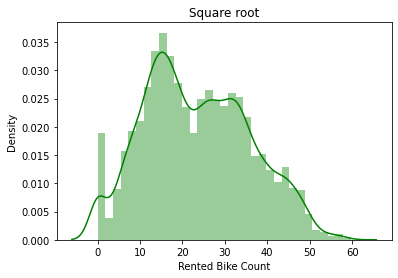

In [25]:
# here we use square root 
sns.distplot(np.sqrt(bike_data['Rented Bike Count']),color='green').set_title("Square root")

In [60]:
#Independent and dependent features
X = new_df.drop(columns=['Rented Bike Count'])
y = np.sqrt(new_df['Rented Bike Count'])

### **Linear Regression**

In [64]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [29]:
# imporing linear models
from sklearn.linear_model import LinearRegression

In [65]:
#Apply a normal linear regression
linearreg=LinearRegression()
linearreg.fit(X_train,y_train)

#predicting on test
linearreg_prediction=linearreg.predict(X_test)

#Calculating R2 score
R_squared=r2_score(linearreg_prediction,y_test)
print("R squared Error on test set : ",R_squared)

#calculating MAE
MAE  = mean_absolute_error(linearreg_prediction,y_test)
print("Mean Absolute error on test set :" , MAE)

#finding MSE
MSE  = mean_squared_error(linearreg_prediction,y_test)
print("Mean squared error :" , MSE)


#Putting together the coefficient and their corresponding variable names
coefficient_df=pd.DataFrame()
coefficient_df["column_Name"]=X_train.columns
coefficient_df['coefficient_Value']=pd.Series(linearreg.coef_)
print(coefficient_df.head(25))

R squared Error on test set :  0.5266803803023361
Mean Absolute error on test set : 5.410037766505531
Mean squared error : 52.13715044579358
                column_Name  coefficient_Value
0                      Hour           0.498839
1           Temperature(°C)           0.550375
2               Humidity(%)          -0.141937
3          Wind speed (m/s)           0.197258
4          Visibility (10m)           0.000963
5   Solar Radiation (MJ/m2)          -1.026962
6              Rainfall(mm)          -1.877746
7             Snowfall (cm)           0.086136
8            Seasons_Spring          -1.284792
9            Seasons_Summer          -1.400304
10           Seasons_Winter          -3.532257
11       Holiday_No Holiday           3.146638
12      Functioning Day_Yes          29.097849
13                year_2018          -0.196936
14             month_August          -4.575485
15           month_December           0.196936
16           month_February          -2.235434
17           

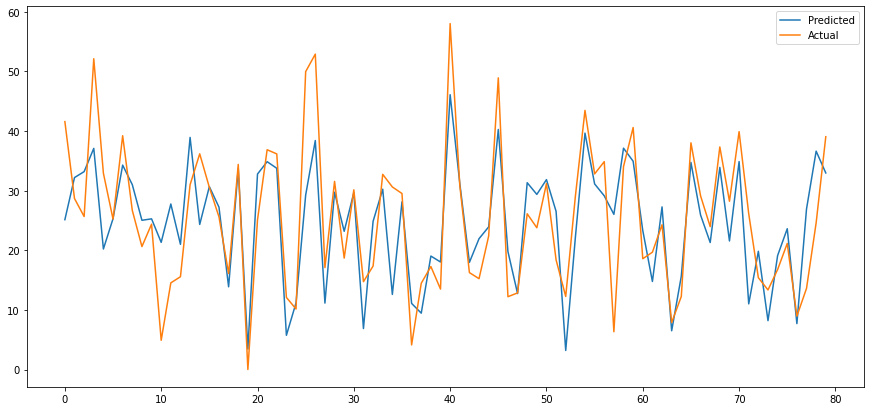

In [97]:
plt.figure(figsize=(15,7))
plt.plot((linearreg_prediction)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

## **Ridge**

In [66]:
#import Ridge regression library
from sklearn.linear_model import Ridge

#Train the model
ridgeRegressor=Ridge(alpha=0.5)
ridgeRegressor.fit(X_train,y_train)
y_predicted_ridge=ridgeRegressor.predict(X_test)

#calculating R2 score
R_squared = r2_score(y_predicted_ridge,y_test)
print("R squared Error on test set : ", R_squared)

#calculating MAE
MAE  = mean_absolute_error(y_predicted_ridge,y_test)
print("Mean Absolute error on test set :" , MAE)

#finding MSE
MSE  = mean_squared_error(y_predicted_ridge,y_test)
print("Mean squared error :" , MSE)


#Putting together the coefficient and their corresponding variable names
coefficient_df=pd.DataFrame()
coefficient_df["column_Name"]=X_train.columns
coefficient_df['coefficient_Value']=pd.Series(ridgeRegressor.coef_)
print(coefficient_df.head(25))


R squared Error on test set :  0.5261573559604378
Mean Absolute error on test set : 5.409885230584141
Mean squared error : 52.12761701935297
                column_Name  coefficient_Value
0                      Hour           0.498901
1           Temperature(°C)           0.550189
2               Humidity(%)          -0.141955
3          Wind speed (m/s)           0.196556
4          Visibility (10m)           0.000962
5   Solar Radiation (MJ/m2)          -1.026471
6              Rainfall(mm)          -1.877511
7             Snowfall (cm)           0.086580
8            Seasons_Spring          -1.278881
9            Seasons_Summer          -1.394133
10           Seasons_Winter          -3.529634
11       Holiday_No Holiday           3.142526
12      Functioning Day_Yes          29.024576
13                year_2018          -0.196530
14             month_August          -4.569038
15           month_December           0.196530
16           month_February          -2.233384
17           

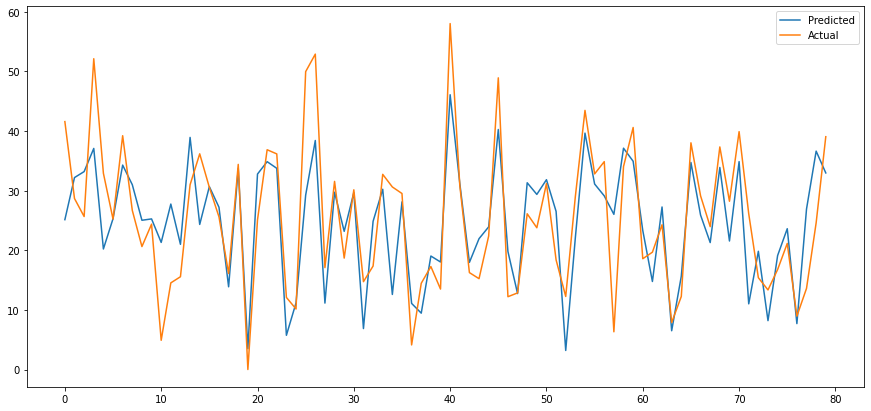

In [96]:
plt.figure(figsize=(15,7))
plt.plot((y_predicted_ridge)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

### **Lasso**

In [67]:
#import Lasso regression library
from sklearn.linear_model import Lasso

#Train the model
lassoRegressor=Lasso(alpha=0.5)
lassoRegressor.fit(X_train,y_train)
y_predicted_lasso=lassoRegressor.predict(X_test)

#calculating R2 score
R_squared = r2_score(y_predicted_lasso,y_test)
print("R squared Error on test set : ", R_squared)

#calculating MAE
MAE  = mean_absolute_error(y_predicted_lasso,y_test)
print("Mean Absolute error on test set :" , MAE)

#finding MSE
MSE  = mean_squared_error(y_predicted_lasso,y_test)
print("Mean squared error :" , MSE)

#Putting together the coefficient and their corresponding variable names
coefficient_df=pd.DataFrame()
coefficient_df["column_Name"]=X_train.columns
coefficient_df['coefficient_Value']=pd.Series(lassoRegressor.coef_)
print(coefficient_df.head(25))


R squared Error on test set :  0.1426218703646135
Mean Absolute error on test set : 6.242529873914273
Mean squared error : 65.94572261923788
                column_Name  coefficient_Value
0                      Hour           0.498293
1           Temperature(°C)           0.563884
2               Humidity(%)          -0.118714
3          Wind speed (m/s)          -0.000000
4          Visibility (10m)           0.000755
5   Solar Radiation (MJ/m2)          -0.000000
6              Rainfall(mm)          -1.319879
7             Snowfall (cm)          -0.000000
8            Seasons_Spring           0.000000
9            Seasons_Summer          -0.000000
10           Seasons_Winter          -0.009277
11       Holiday_No Holiday           0.000000
12      Functioning Day_Yes          11.306739
13                year_2018           0.000000
14             month_August          -0.000000
15           month_December          -0.000000
16           month_February          -0.000000
17           

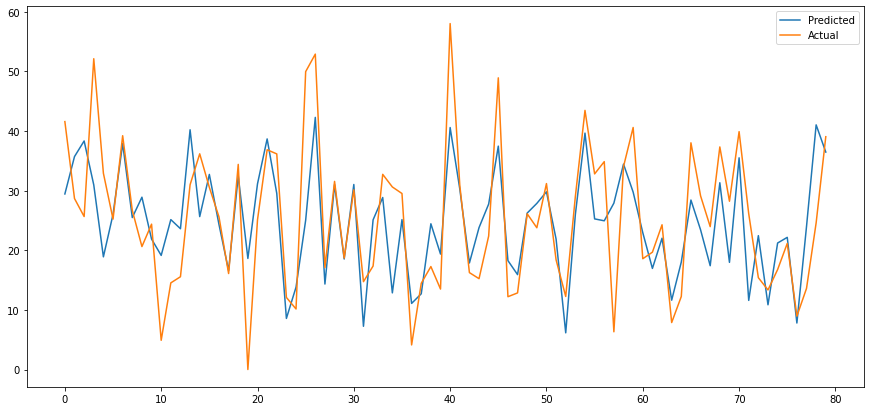

In [95]:
plt.figure(figsize=(15,7))
plt.plot((y_predicted_lasso)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

### **Polynomial Regression**

In [68]:
# importing polynominal features from sklearn
from sklearn.preprocessing import PolynomialFeatures

In [69]:
poly = PolynomialFeatures(2) #creating variable with degree 2
poly_X_train = poly.fit_transform(X_train) # fit the train set
poly_X_test = poly.transform(X_test) #transform the test set

In [70]:
poly.fit(poly_X_train,y_train)

PolynomialFeatures()

In [71]:
linearreg.fit(poly_X_train,y_train)

LinearRegression()

In [72]:
poly_pred= linearreg.predict(poly_X_test)

In [73]:

#Calculating R2 score
R_squared=r2_score(poly_pred,y_test)
print("R squared Error on test set : ",R_squared)

#calculating MAE
MAE  = mean_absolute_error(poly_pred,y_test)
print("Mean Absolute error on test set :" , MAE)

#finding MSE
MSE  = mean_squared_error(poly_pred,y_test)
print("Mean squared error :" , MSE)

R squared Error on test set :  0.6018881899508451
Mean Absolute error on test set : 4.487716668764497
Mean squared error : 51.570618288893755


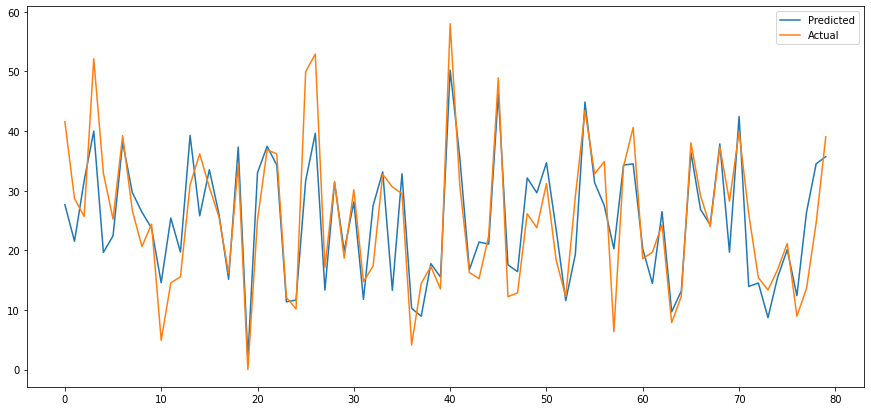

In [94]:
plt.figure(figsize=(15,7))
plt.plot((poly_pred)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

### **Decision Tree**

In [74]:
#importing the regressor
from sklearn.tree import DecisionTreeRegressor

In [75]:
# Parameters for Decission Tree model
param_grid = {'criterion' : ["mse"],
              'splitter' : ["best", "random"],
              'max_depth' : [10,15,20,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [76]:
# Using Grid Search 
Dt_grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=2,n_jobs=-1)

In [77]:
Dt_grid_search.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'],
                         'max_depth': [10, 15, 20, 'none'],
                         'max_features': [24, 35, 40, 49],
                         'min_samples_split': [10, 50, 100],
                         'splitter': ['best', 'random']})

In [43]:
Dt_pred=Dt_grid_search.predict(X_test)

In [44]:
#calculating R2 score
R_squared = r2_score(y_test,Dt_pred)
print("R squared Error on test set : ", R_squared)

#calculating MAE
MAE  = mean_absolute_error(y_test,Dt_pred)
print("Mean Absolute error on test set :" , MAE)

#finding MSE
MSE  = mean_squared_error(y_test,Dt_pred)
print("Mean squared error :" , MSE)

R squared Error on test set :  0.8632480214564768
Mean Absolute error on test set : 3.151356465427272
Mean squared error : 20.696802013237836


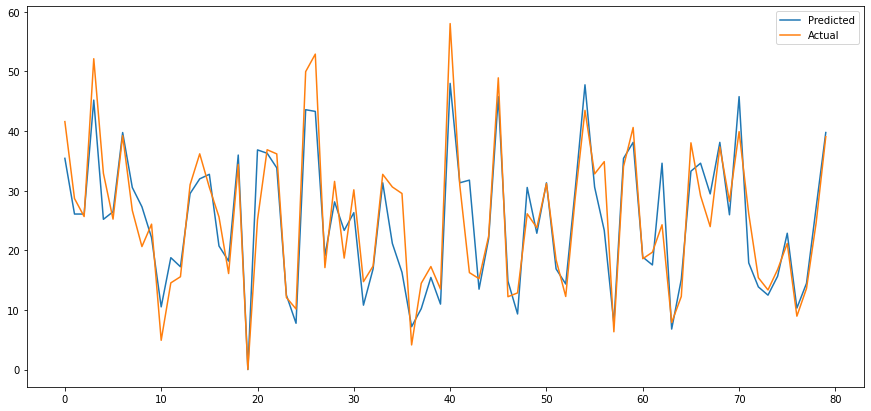

In [93]:
plt.figure(figsize=(15,7))
plt.plot((Dt_pred)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

### **Random Forest**

In [78]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [79]:
#Hyperparameters
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
#Randomized Search CV

#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Number of features to consider at every split
max_features=['auto','sqrt']
#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#Minimum number of samples to split a node
min_samples_split=[2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [82]:
#Create the random grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [83]:
#First create the base model
rf=RandomForestRegressor()

In [84]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [85]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
predictions=rf_random.predict(X_test)

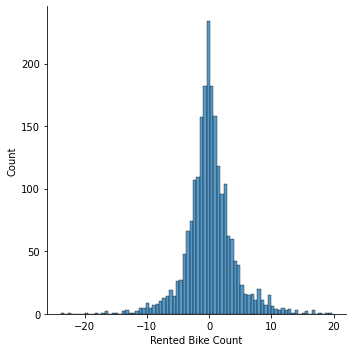

In [87]:
sns.displot(y_test-predictions)

In [88]:
#calculating R2 score
R_squared = r2_score(y_test,predictions)
print("R squared Error on test set : ", R_squared)

#calculating MAE
MAE  = mean_absolute_error(y_test,predictions)
print("Mean Absolute error on test set :" , MAE)

#finding MSE
MSE  = mean_squared_error(y_test,predictions)
print("Mean squared error :" , MSE)

R squared Error on test set :  0.8966187261149843
Mean Absolute error on test set : 2.682181715975405
Mean squared error : 15.646294702738148


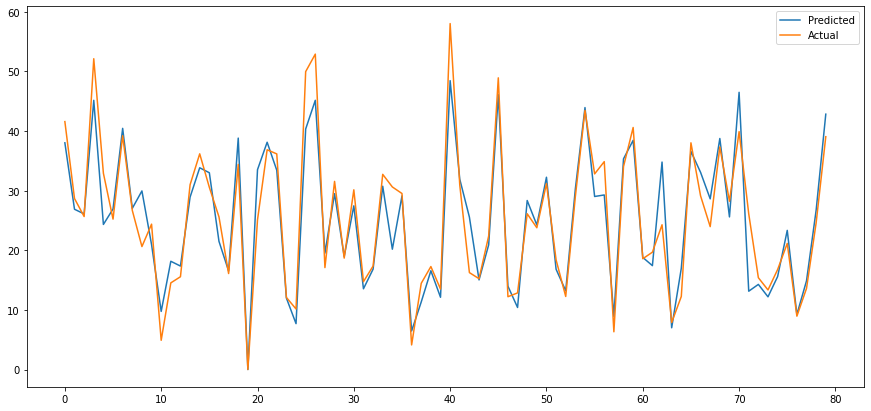

In [98]:
plt.figure(figsize=(15,7))
plt.plot((predictions)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

## **AdaBoost Regressor**



In [89]:
# Importing Ada Boost Regressor from sklearn.ensemble
from sklearn.ensemble import AdaBoostRegressor

In [90]:
# parameters for Ada Boost Regressor
param_grid = {'n_estimators': [50,100,150,200],
          'learning_rate':[0.5,1,1.5,2],
          'base_estimator': [LinearRegression(),DecisionTreeRegressor()]}

In [91]:
#creating Ada boost grid model
Ada_boost_grid_search = GridSearchCV(AdaBoostRegressor(),param_grid=param_grid,n_jobs=-1)

In [92]:
Ada_boost_grid_search.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'base_estimator': [LinearRegression(),
                                            DecisionTreeRegressor()],
                         'learning_rate': [0.5, 1, 1.5, 2],
                         'n_estimators': [50, 100, 150, 200]})

In [37]:
Ada_boost_predict=Ada_boost_grid_search.predict(X_test)

In [38]:
#calculating R2 score
R_squared = r2_score(y_test,Ada_boost_predict)
print("R squared Error on test set : ", R_squared)

#calculating MAE
MAE  = mean_absolute_error(y_test,Ada_boost_predict)
print("Mean Absolute error on test set :" , MAE)

#finding MSE
MSE  = mean_squared_error(y_test,Ada_boost_predict)
print("Mean squared error :" , MSE)

R squared Error on test set :  0.8922769047334534
Mean Absolute error on test set : 2.65375589144663
Mean squared error : 16.303410003499856


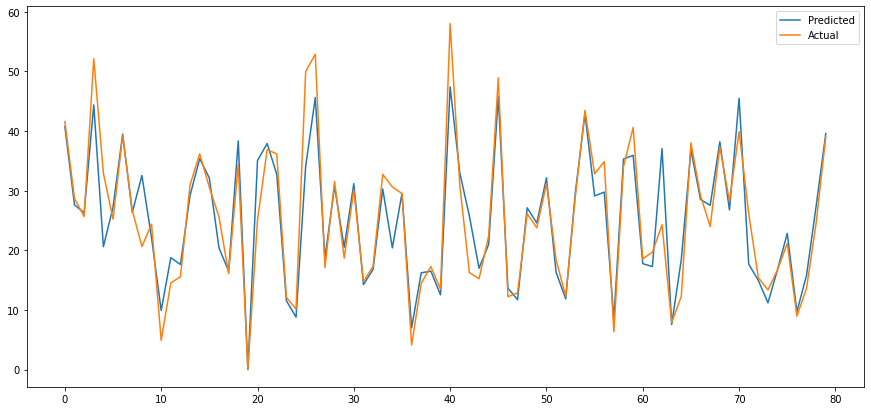

In [99]:
plt.figure(figsize=(15,7))
plt.plot((Ada_boost_predict)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

## **Evaluation Metrics**

In [103]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME","MSE","MAE","R2"])
test.add_row(['1','Linear Regression','52.13','5.41','0.52'])
test.add_row(['2','Ridge Regression','52.12','5.40','0.52'])
test.add_row(['3','Lasso Regression','65.94','6.24','0.14'])
test.add_row(['4','Polynomial Regression','51.57','4.48','0.60'])
test.add_row(['5','Decision Tree','20.69','3.15','0.86'])
test.add_row(['6','Random Forest','15.64','2.68','0.89'])
test.add_row(['7','Ada Boosting','16.3','2.65','0.89'])
print(test)

+-------+-----------------------+-------+------+------+
| SL NO |       MODEL_NAME      |  MSE  | MAE  |  R2  |
+-------+-----------------------+-------+------+------+
|   1   |   Linear Regression   | 52.13 | 5.41 | 0.52 |
|   2   |    Ridge Regression   | 52.12 | 5.40 | 0.52 |
|   3   |    Lasso Regression   | 65.94 | 6.24 | 0.14 |
|   4   | Polynomial Regression | 51.57 | 4.48 | 0.60 |
|   5   |     Decision Tree     | 20.69 | 3.15 | 0.86 |
|   6   |     Random Forest     | 15.64 | 2.68 | 0.89 |
|   7   |      Ada Boosting     |  16.3 | 2.65 | 0.89 |
+-------+-----------------------+-------+------+------+


***Ensemble techniques are performing well for this regression problem.***

***Random Forest and AdaBoost are performing well. Both have an accuracy of 89%.***